## Project2_CLassification_Group04_Suraj_Divyank

In [30]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [31]:
# Reading the dataset
missing_values = ["n/a", "na", "--","?"," -   "]
df = pd.read_csv("A:\\sem2\\Applied Machine Learning\\project\\Startup.csv", na_values = missing_values)


In [32]:
df.shape

(49438, 36)

In [33]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49438 entries, 0 to 49437
Data columns (total 36 columns):
permalink               49438 non-null object
name                    49437 non-null object
homepage_url            45989 non-null object
category_list           45477 non-null object
 market                 45470 non-null object
 funding_total_usd      40907 non-null object
status                  48124 non-null object
country_code            44165 non-null object
funding_rounds          49438 non-null int64
founded_at              38554 non-null object
founded_month           38482 non-null object
founded_quarter         38482 non-null object
founded_year            38482 non-null float64
first_funding_at        49438 non-null object
last_funding_at         49438 non-null object
seed                    49438 non-null int64
venture                 49438 non-null int64
equity_crowdfunding     49438 non-null int64
undisclosed             49438 non-null int64
convertible_note     

In [34]:
#From info it is apparent that the dataset contains numerical and categorical features so lets find the count of these
#features.

numerical_feats = df.dtypes[df.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = df.dtypes[df.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  23
Number of Categorical features:  13


In [35]:
#Displaying the numerical and categorical features of the dataset
print(df[numerical_feats].columns)
print("*"*100)
print(df[categorical_feats].columns)

Index(['funding_rounds', 'founded_year', 'seed', 'venture',
       'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A',
       'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G',
       'round_H'],
      dtype='object')
****************************************************************************************************
Index(['permalink', 'name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'founded_at',
       'founded_month', 'founded_quarter', 'first_funding_at',
       'last_funding_at'],
      dtype='object')


In [5]:
#lets try to observe the missing data in every column of the dataset.
pd.options.display.max_rows = 4000
miss_tot = df.isnull().sum().sort_values(ascending=False)
miss_percent = (df.isnull().sum()/len(df)).sort_values(ascending=False)
miss_data = pd.concat([miss_tot, miss_percent ], axis=1, keys=['miss_tot', 'miss_percent'])
miss_data


,miss_tot,miss_percent
founded_month,10956,0.221611
founded_quarter,10956,0.221611
founded_year,10956,0.221611
founded_at,10884,0.220155
funding_total_usd,8531,0.172560
country_code,5273,0.106659
market,3968,0.080262
category_list,3961,0.080121
homepage_url,3449,0.069764
status,1314,0.026579


In [36]:
# Made 'name' column as index of the dataframe
df.set_index('name', inplace = True)

In [37]:
# Removing all the spaces
df.columns = df.columns.str.replace(' ', '')

In [38]:
# The 'funding_total_usd' column is string and has spaces, whereas it should be float.So, we have removed the spaces and converted it into float data type.
df['funding_total_usd']=df['funding_total_usd'].str.replace(',','')
df['funding_total_usd'] = df['funding_total_usd'].astype(float)
df['funding_total_usd'].head()

name
#waywire              1750000.0
&TV Communications    4000000.0
'Rock' Your Paper       40000.0
(In)Touch Network     1500000.0
-R- Ranch and Mine      60000.0
Name: funding_total_usd, dtype: float64

In [39]:
#We have to rename the column names as it contains spaces.
df = df.rename(columns={' market ': 'market', ' funding_total_usd ': 'funding_total_usd'})

In [40]:
# The below columns are not significant in our analysis. Hence, we removed them.
df.drop(['permalink','homepage_url','category_list','founded_at','founded_month','founded_quarter','founded_year','first_funding_at','last_funding_at'],axis = 1, inplace = True)

In [41]:
#Checking the shape of columns after droping the insignificant columns.
df.shape

(49438, 26)

In [42]:
#Checking the totla number of null values.
df.isnull().sum().sum()

19086

In [44]:
#Introducing more Null values. So, as to make the percentage of null values between 5-10%
df = df.mask(np.random.random(df.shape) < 0.06)

In [45]:
#Checking the % of null values in our dataset.
((df.isnull().sum().sum())/(49438*26))*100

12.955698979607714

In [46]:
#Checking total number of companies which are closed
q = df[(df['status'] == 'closed')]
q.shape

(2273, 26)

In [47]:
#The below are the figures shows that 61% of the companies gets closed because they didn't receive seed and angel funding.
w = df[(df['angel'] == 0) & (df['seed'] == 0) & (df['status'] == 'closed')]
w.shape

(1072, 26)

In [48]:
#From info it is apparent that the dataset contains numerical and categorical features so lets find the count of these
#features.

numerical_feats = df.dtypes[df.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = df.dtypes[df.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  23
Number of Categorical features:  3


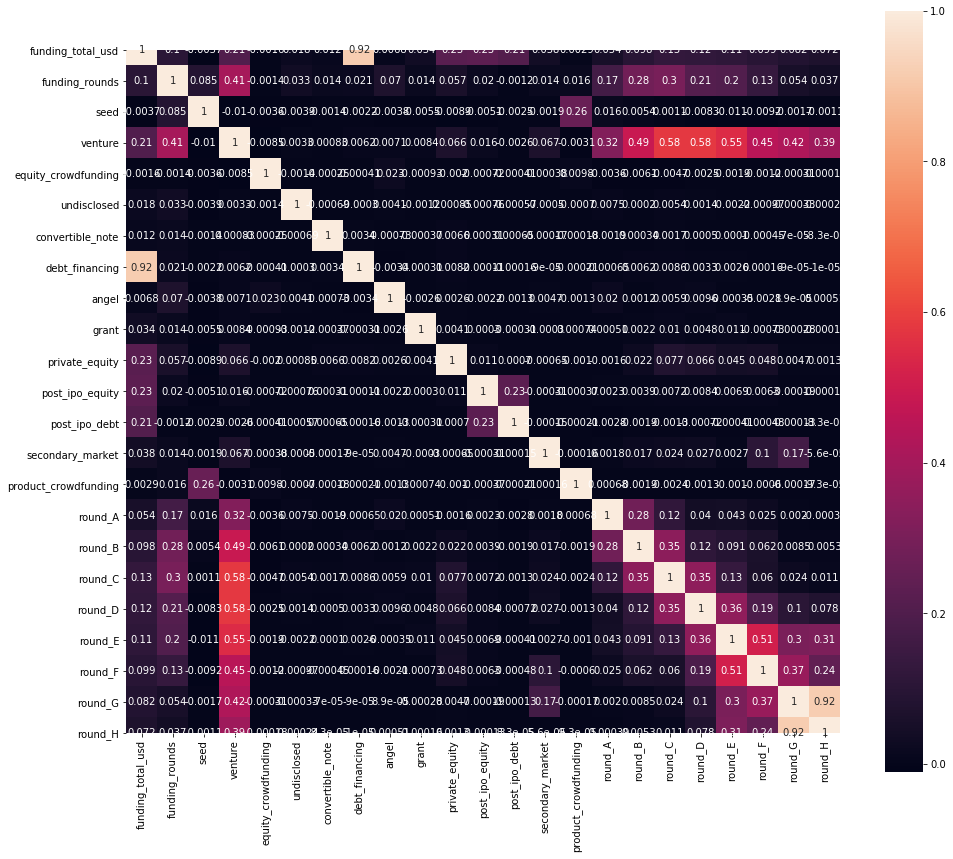

In [74]:
#Correlation using heatmap

fig = plt.figure(figsize = (16,14))

sns.heatmap(df[list(numerical_feats)].corr(),annot = True,square = True);

From the above plot it is very evident that columns round_g and round_h are highly correlated and have to be dealt with.

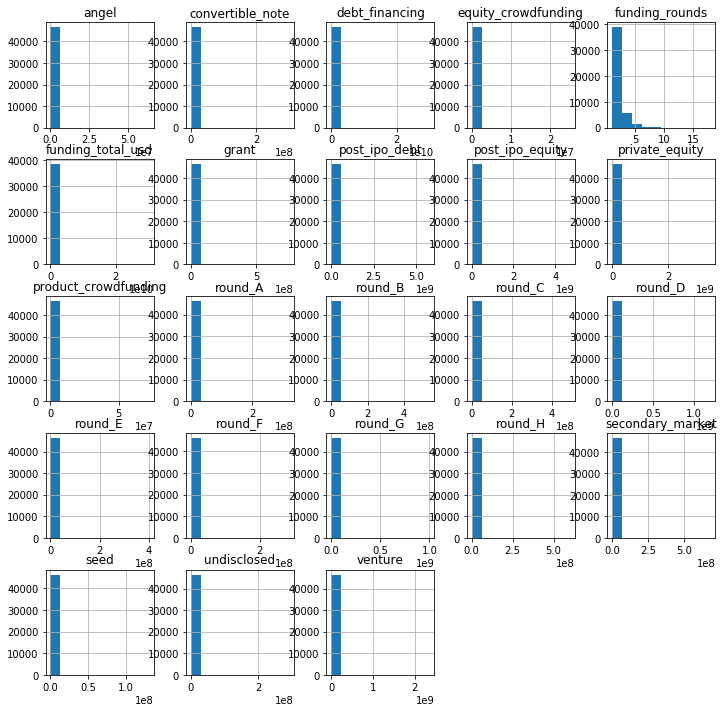

In [75]:
#plotting bar charts for all the numerical variables present in the data.

df[list(numerical_feats)].hist(figsize = (12,12));

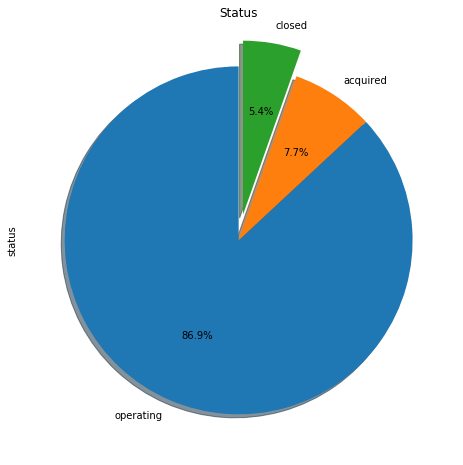

In [76]:
plt.figure(figsize = (8,8))
df.status.value_counts().plot(kind='pie',shadow=True, explode=(0, 0, 0.15), startangle=90,autopct='%1.1f%%')
plt.title('Status')
plt.show()

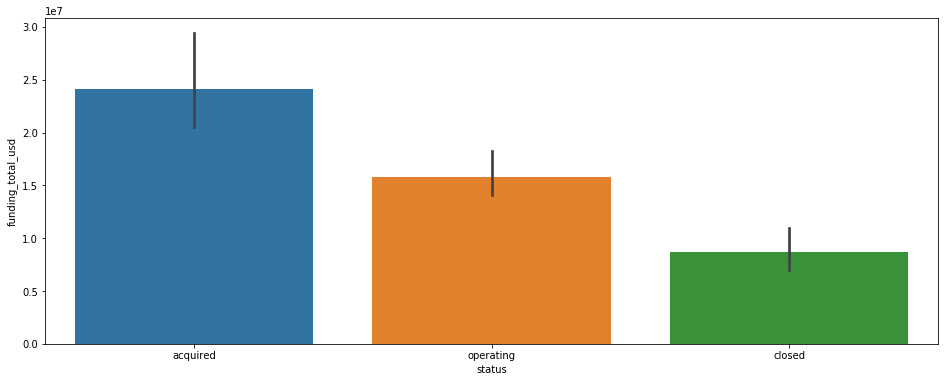

In [77]:
#For relationship between one categorical variable and one numerical variable;

plt.figure(figsize=(16, 6))
sns.barplot(df['status'],df['funding_total_usd'])

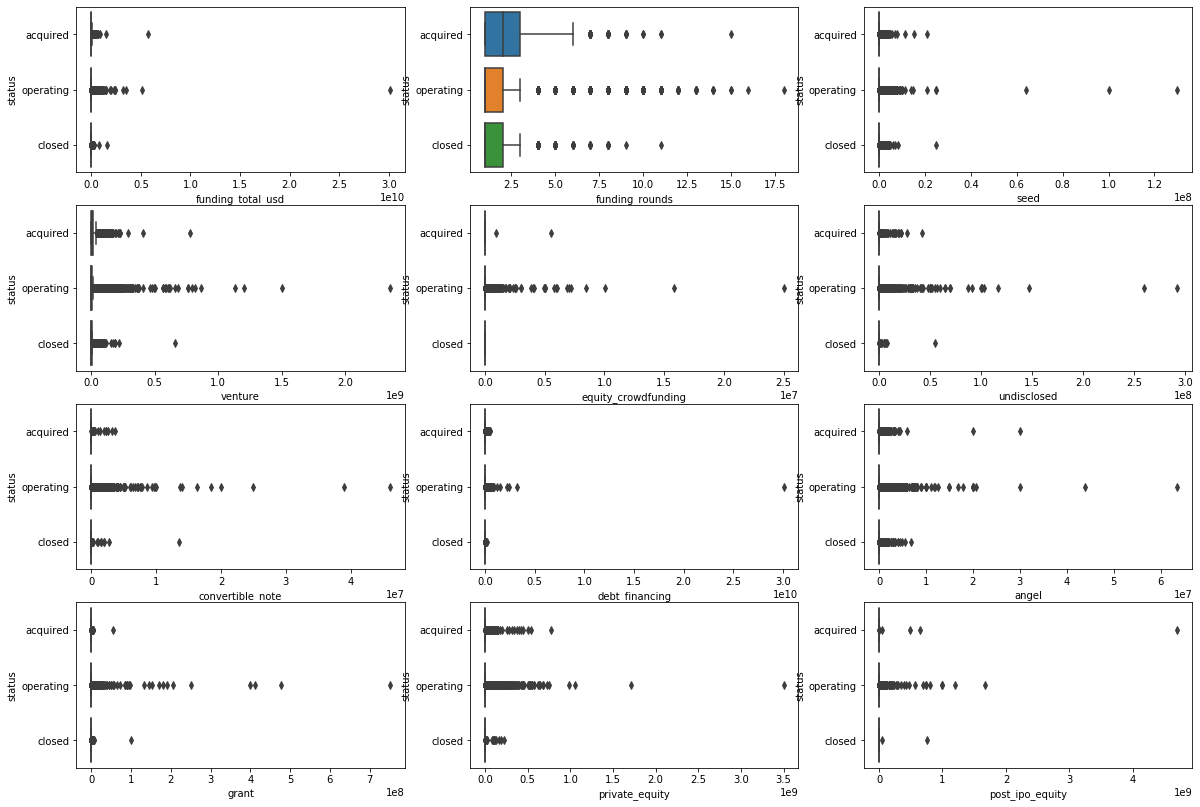

In [78]:
#for studying relationship between categorical variable and numerical variable:

fig, ax = plt.subplots(4, 3, figsize=(20, 14))
for var, subplot in zip(numerical_feats[:12], ax.flatten()):
       sns.boxplot(x=var, y='status', data=df, ax=subplot)

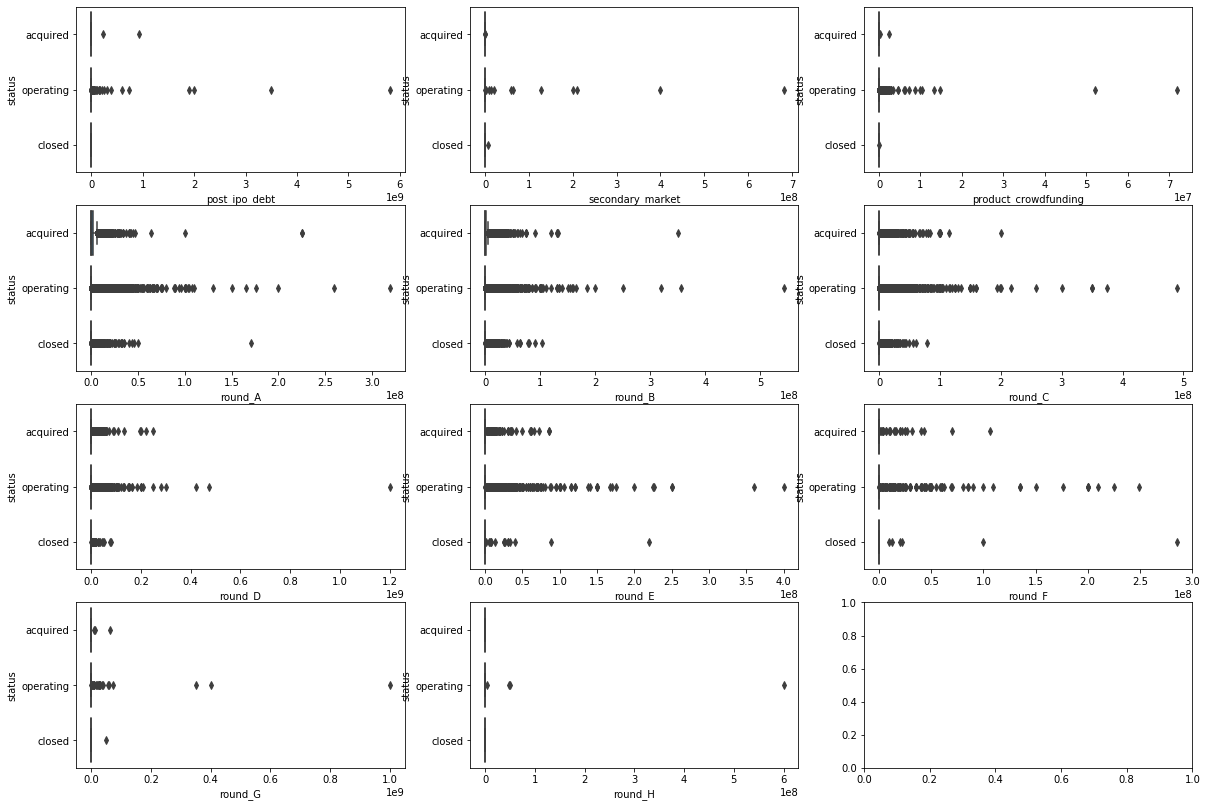

In [79]:
#for studying relationship between categorical variable and numerical variable:

fig, ax = plt.subplots(4, 3, figsize=(20, 14))
for var, subplot in zip(numerical_feats[12:], ax.flatten()):
       sns.boxplot(x=var, y='status', data=df, ax=subplot)

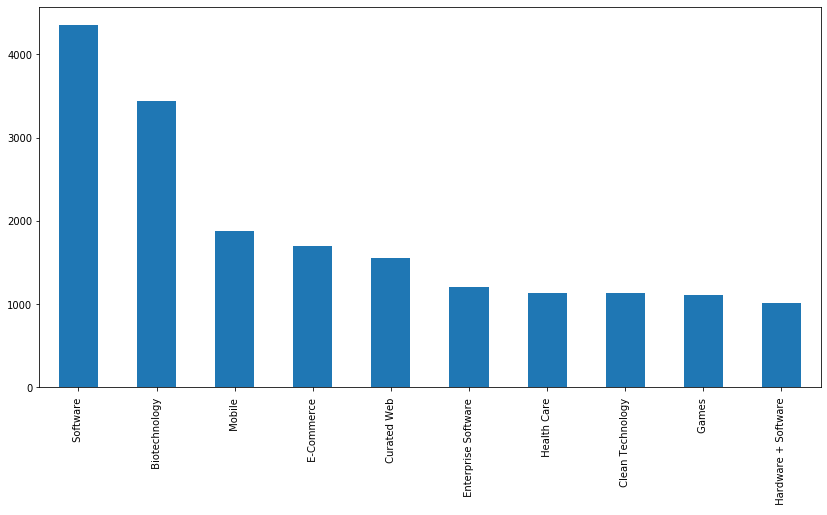

In [80]:
#We can see that most of the startups have opened in the software sector, followed by Biotechnology and mobile sector.
df['market'].value_counts().nlargest(10).plot(kind='bar',figsize=(14, 7));

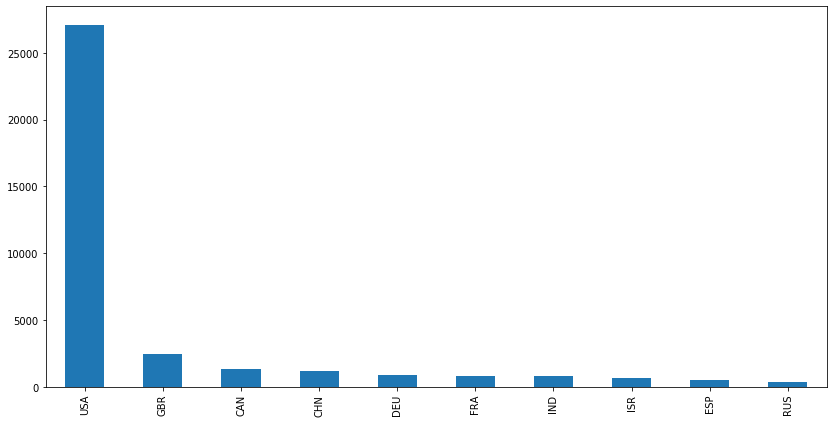

In [81]:
#In the given years we can see that most of the startups have been opened up in the USA, followed by Britain and Canada.
df['country_code'].value_counts().nlargest(10).plot(kind='bar',figsize=(14, 7));

In [49]:
# Imputing 'market', 'status','country_code' with mode
for column in ['market', 'status','country_code']:    
    df[column].fillna(df[column].mode()[0], inplace=True)

In [50]:
# Imputing numerical columns based on the mean of unique groups generated using 'market' & 'country_code'
for column in numerical_feats:    
    df[column] = df.groupby(['market','country_code'])[column].transform(lambda x: x.fillna(x.mean()))

In [51]:
# Imputing left over rows numerical columns based on the mean of unique groups generated using 'market'
for column in numerical_feats:    
    df[column] = df.groupby(['market'])[column].transform(lambda x: x.fillna(x.mean()))

In [52]:
# Imputing left over rows of numerical columns based on the mean of that column
df.fillna(df.mean(), inplace=True)

In [53]:
for column in categorical_feats :
    print(f"Null values in {column}: {df[column].isna().sum()}")
for column in numerical_feats :
    print(f"Null values in {column}: {df[column].isna().sum()}")

Null values in market: 0
Null values in status: 0
Null values in country_code: 0
Null values in funding_total_usd: 0
Null values in funding_rounds: 0
Null values in seed: 0
Null values in venture: 0
Null values in equity_crowdfunding: 0
Null values in undisclosed: 0
Null values in convertible_note: 0
Null values in debt_financing: 0
Null values in angel: 0
Null values in grant: 0
Null values in private_equity: 0
Null values in post_ipo_equity: 0
Null values in post_ipo_debt: 0
Null values in secondary_market: 0
Null values in product_crowdfunding: 0
Null values in round_A: 0
Null values in round_B: 0
Null values in round_C: 0
Null values in round_D: 0
Null values in round_E: 0
Null values in round_F: 0
Null values in round_G: 0
Null values in round_H: 0


In [22]:
df.isna().sum().sum()

11002

In [54]:
#Separation of dependent and independent variables.
y = df.loc[:,'status']
X = df.loc[:, df.columns != 'status']

In [55]:
# Converting categorical variables into dummies.
X = pd.get_dummies(X)

In [56]:
X.shape

(49438, 875)

In [57]:
#sklearn splittting the dataset randomly into train set and test set.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [58]:
# Standardize data using RobustScaler. This helps to overcome the effect of outliers while standarization

from sklearn.preprocessing import RobustScaler
rc = RobustScaler()
X_train = rc.fit_transform(X_train)
X_test = rc.transform(X_test)


In [59]:
X_train

array([[-0.19074502,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.27066232,  0.83622047,  1.39686895, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82510156,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.79382729,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.06068662,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 2.09368837,  3.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [60]:
X_test

array([[-0.24760141,  1.        ,  1.78575501, ...,  0.        ,
         0.        ,  0.        ],
       [ 3.63088044,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.69789612,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.2644031 ,  0.        ,  1.27806486, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.06978961,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.27066232,  0.        ,  1.63343039, ...,  0.        ,
         0.        ,  0.        ]])

In [61]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve, auc
from datetime import datetime
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelBinarizer

## DECISION TREE

In [96]:
#Without Hyper Parameters Tuning
#DesicionTree
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(random_state=123)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Recall Score:",metrics.recall_score(prediction,y_test,average='micro'))
print("Precision Score:",metrics.precision_score(prediction,y_test,average='micro'))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))


Accuracy: 0.7949029126213593
Recall Score: 0.7949029126213593
Precision Score: 0.7949029126213593
Confusion Matrix:
 [[  140    63   832]
 [   55    63   578]
 [  873   641 11587]]


0.5282732691469666

In [97]:
#With Hyper Parameters Tuning
#DesicionTree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(random_state=123)
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9],
          'random_state':[123]}
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1, verbose=2)
model1.fit(X_train,y_train)
print("Best Hyper Parameters:",model1.best_params_)
prediction=model1.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Recall Score:",metrics.recall_score(prediction,y_test,average='micro'))
print("Precision Score:",metrics.precision_score(prediction,y_test,average='micro'))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

C:\Users\divya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 243 candidates, totalling 729 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 729 out of 729 | elapsed: 14.2min finished


Best Hyper Parameters: {'max_features': 'log2', 'min_samples_leaf': 6, 'min_samples_split': 2, 'random_state': 123}
Accuracy: 0.8762135922330098
Recall Score: 0.8762135922330098
Precision Score: 0.8762135922330098
Confusion Matrix:
 [[    0     0     0]
 [    0     0     1]
 [ 1068   767 12996]]


 ## Random Forest

In [98]:
#Without Hyper Parameters Tuning
#Randomforest
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_jobs=-1,random_state=123)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Recall Score:",metrics.recall_score(prediction,y_test,average='micro'))
print("Precision Score:",metrics.precision_score(prediction,y_test,average='micro'))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

C:\Users\divya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 0.8563915857605178
Recall Score: 0.8563915857605178
Precision Score: 0.8563915857605178
Confusion Matrix:
 [[   52    17   233]
 [   16    18   132]
 [ 1000   732 12632]]


In [99]:
#With Hyper Parameters Tuning and grid search
#Randomforest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
params = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6], 
          'random_state':[123],
          'n_jobs':[-1]}
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1, verbose=1)
model1.fit(X_train,y_train)
print("Best Hyper Parameters:\n",model1.best_params_)
prediction=model1.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Recall Score:",metrics.recall_score(prediction,y_test,average='micro'))
print("Precision Score:",metrics.precision_score(prediction,y_test,average='micro'))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

C:\Users\divya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 19.2min finished


Best Hyper Parameters:
 {'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 20, 'n_jobs': -1, 'random_state': 123}
Accuracy: 0.8763484358144552
Recall Score: 0.8763484358144552
Precision Score: 0.8763484358144552
Confusion Matrix:
 [[    1     0     0]
 [    0     0     0]
 [ 1067   767 12997]]


# KNN Neighbors

In [100]:
#Without Hyper Parameters Tuning
#kNearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

Accuracy: 0.8600997842502697
Confusion Matrix:
 [[   60    20   224]
 [   18    11    87]
 [  990   736 12686]]


In [122]:
#With Hyper Parameters Tuning and grid search
#kNearestNeighbors
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
params = {'n_neighbors':[8,9,10,3,12,1],
          'leaf_size':[10,12,14,30]}
model1 = GridSearchCV(model, param_grid=params,n_jobs=-1, verbose=1)
model1.fit(X_train,y_train)
print("Best Hyper Parameters:\n",model1.best_params_)
prediction=model1.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

C:\Users\divya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 14.7min finished


Best Hyper Parameters:
 {'leaf_size': 10, 'n_neighbors': 12}
Accuracy: 0.8873333333333333
Confusion Matrix:
 [[   4    0    4]
 [   0    0    3]
 [ 205  126 2658]]


## SVM

In [52]:
#Without Hyper Parameters Tuning
#SVM
from sklearn import svm
model = svm.SVC(random_state=1234)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

Accuracy: 0.8333333333333334
Confusion Matrix:
 [[ 0  0  0]
 [ 0  0  0]
 [ 2  3 25]]


C:\Users\divya\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [53]:
#With Hyper Parameters Tuning
#SVM
from sklearn import svm
from sklearn.model_selection import GridSearchCV
model=svm.SVC()
params = {'C': [2,3], 
          'kernel': ['sigmoid','rbf'],
         'gamma' : [0.01, 1]}
model1 = GridSearchCV(model, param_grid=params,n_jobs=-1, verbose=1)
model1.fit(X_train,y_train)
print("Best Hyper Parameters:\n",model1.best_params_)
prediction=model1.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Recall Score:",metrics.recall_score(prediction,y_test,average='micro'))
print("Precision Score:",metrics.precision_score(prediction,y_test,average='micro'))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

C:\Users\divya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\divya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Hyper Parameters:
 {'C': 2, 'gamma': 1, 'kernel': 'rbf'}
Accuracy: 0.8
Recall Score: 0.8
Precision Score: 0.8
Confusion Matrix:
 [[ 0  0  1]
 [ 0  0  0]
 [ 2  3 24]]


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   34.9s finished
C:\Users\divya\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Logistic Regression

In [102]:
#Without Hyper Parameters Tuning
#Logistic Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
model= LogisticRegression(random_state=123)
model.fit(X_train,y_train)
#print("Best Hyper Parameters:",model1.best_params_)
prediction=model.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Recall Score:",metrics.recall_score(prediction,y_test,average='micro'))
print("Precision Score:",metrics.precision_score(prediction,y_test,average='micro'))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

C:\Users\divya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\divya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy: 0.8762810140237325
Recall Score: 0.8762810140237325
Precision Score: 0.8762810140237325
Confusion Matrix:
 [[    0     0     0]
 [    0     0     0]
 [ 1068   767 12997]]


In [103]:
#With Hyper Parameters Tuning
#Logistic Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
model= LogisticRegression(random_state=123)
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
          'penalty' : ['l1', 'l2']
         }
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1, verbose=1)
model1.fit(X_train,y_train)
print("Best Hyper Parameters:",model1.best_params_)
prediction=model1.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Recall Score:",metrics.recall_score(prediction,y_test,average='micro'))
print("Precision Score:",metrics.precision_score(prediction,y_test,average='micro'))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

C:\Users\divya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  9.6min finished
C:\Users\divya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\divya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\divya\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Best Hyper Parameters: {'C': 0.001, 'penalty': 'l1'}
Accuracy: 0.8757416396979504
Recall Score: 0.8757416396979504
Precision Score: 0.8757416396979504
Confusion Matrix:
 [[    0     0     8]
 [    0     0     0]
 [ 1068   767 12989]]


## After running all the models we can observe that recall, precision and accuracy are the same for every model and hence we are going with the model which has the highest accuracy parameter among these which in our case is of random forest. It has the accuracy of 87.3 percent.

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

### Hard Voting classifier

In [41]:
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
knn_clf = KNeighborsClassifier(7)
knn_clf.fit(X_train, y_train)

#here we are creating voting classifier. Voting can be hard or soft

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

#vating is hard i.e. it goes for majority. Voting classifier
# is not doing a good job. Its as good as SVM but KNN is doing better than this.
from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

C:\Users\divya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\divya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\divya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\divya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\divya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

LogisticRegression 0.8754719525350594
KNeighborsClassifier 0.867651024811219


C:\Users\divya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\divya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


VotingClassifier 0.867651024811219


### Soft voting classifier

In [43]:
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
knn_clf = KNeighborsClassifier(7)
knn_clf.fit(X_train, y_train)
#here we are creating voting classifier. Voting can be hard or soft

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

#vating is hard i.e. it goes for majority. Voting classifier
# is not doing a good job. Its as good as SVM but KNN is doing better than this.
from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

C:\Users\divya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\divya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\divya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\divya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\divya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

LogisticRegression 0.8754719525350594
KNeighborsClassifier 0.867651024811219


C:\Users\divya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\divya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


VotingClassifier 0.8739212513484358


### 2a models wth Bagging:- ( Decision tree and Random Forest)

In [45]:
#Decision Tree
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from  sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=0)
bag_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1,oob_score=True, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print('Train score for Bagging Descision tree classifier: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score for Bagging Descision tree classifier: {:.2f}'.format(bag_clf.score(X_test, y_test)))
print("The out of bag score is",bag_clf.oob_score_)

Train score for Bagging Descision tree classifier: 0.88
Test score for Bagging Descision tree classifier: 0.88
The out of bag score is 0.8815234352424435


In [47]:
# Random forest
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, bootstrap=True, n_jobs=-1,oob_score=True, random_state=0)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)
print('Test score for Random Forest classifier : {:.2f}'.format(accuracy_score(y_test, y_pred_rf)))
print("The out of bag score is",rnd_clf.oob_score_)

Test score for Random Forest classifier : 0.88
The out of bag score is 0.8815234352424435


### 2b models wth pasting:- ( Decision tree and Random Forest)

In [48]:
#Decision Tree
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from  sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=0)
bag_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=100, n_jobs=-1, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
print('Train score for Bagging Descision tree classifier: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score for Bagging Descision tree classifier: {:.2f}'.format(bag_clf.score(X_test, y_test)))

Train score for Bagging Descision tree classifier: 0.88
Test score for Bagging Descision tree classifier: 0.88
The out of bag score is 0.8815234352424435


In [49]:
# Random forest
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=0)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)
print('Test score for Random Forest classifier : {:.2f}'.format(accuracy_score(y_test, y_pred_rf)))

Test score for Random Forest classifier : 0.88


### 3 Apply any two models with adaboost boosting

In [50]:
#Descision tree using adaboost classifier
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_clf.fit(X_train, y_train)
print('Train score for Descision tree using adaboost classifier: {:.2f}'.format(ada_clf.score(X_train, y_train)))
print('Test score for Descision tree using adaboost classifie: {:.2f}'.format(ada_clf.score(X_test, y_test)))

Train score for Descision tree using adaboost classifier: 0.88
Test score for Descision tree using adaboost classifie: 0.88


In [51]:
#Random forest using adaboost classifier
from sklearn.ensemble import AdaBoostClassifier

ada_rnd_clf = AdaBoostClassifier(RandomForestClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_rnd_clf.fit(X_train, y_train)
print('Train score for random forest using adaboost classifier: {:.2f}'.format(ada_rnd_clf.score(X_train, y_train)))
print('Test score for random forest using adaboost classifie: {:.2f}'.format(ada_rnd_clf.score(X_test, y_test)))

C:\Users\divya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\divya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\divya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\divya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\divya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

Train score for random forest using adaboost classifier: 0.88
Test score for random forest using adaboost classifie: 0.88


### 4.Apply one model with gradient boosting

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0,learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.882
Accuracy on test set: 0.875


### 5 Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 1, prepare similar table for all the models after PCA and compare both tables.

In [98]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)

cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [99]:
d

6

In [100]:
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

In [101]:
X_train_reduced.shape

(34606, 6)

In [102]:
pca.n_components_

6

In [103]:
X_test_reduced = pca.transform(X_test)

In [104]:
X_test_reduced.shape

(14832, 6)

In [105]:
np.sum(pca.explained_variance_ratio_)

0.9568960437926383

### Decision Tree using PCA

In [96]:
#Without Hyper Parameters Tuning
#DesicionTree
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(random_state=123)
model.fit(X_train_reduced,y_train)
prediction=model.predict(X_test_reduced)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Recall Score:",metrics.recall_score(prediction,y_test,average='micro'))
print("Precision Score:",metrics.precision_score(prediction,y_test,average='micro'))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

Accuracy: 0.8237594390507011
Recall Score: 0.8237594390507011
Precision Score: 0.8237594390507011
Confusion Matrix:
 [[  105    32   571]
 [   25    26   327]
 [  947   712 12087]]


In [97]:
#With Hyper Parameters Tuning
#DesicionTree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(random_state=123)
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9],
          'random_state':[123]}
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1, verbose=2)
model1.fit(X_train_reduced,y_train)
print("Best Hyper Parameters:",model1.best_params_)
prediction=model1.predict(X_test_reduced)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Recall Score:",metrics.recall_score(prediction,y_test,average='micro'))
print("Precision Score:",metrics.precision_score(prediction,y_test,average='micro'))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

C:\Users\divya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 243 candidates, totalling 729 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   16.0s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done 729 out of 729 | elapsed:   30.2s finished


Best Hyper Parameters: {'max_features': 'auto', 'min_samples_leaf': 9, 'min_samples_split': 2, 'random_state': 123}
Accuracy: 0.8629989212513485
Recall Score: 0.8629989212513485
Precision Score: 0.8629989212513485
Confusion Matrix:
 [[   39    14   209]
 [    1     4    19]
 [ 1037   752 12757]]


### Random forest using PCA

In [99]:
#Without Hyper Parameters Tuning
#Randomforest
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_jobs=-1,random_state=123)
model.fit(X_train_reduced,y_train)
prediction=model.predict(X_test_reduced)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Recall Score:",metrics.recall_score(prediction,y_test,average='micro'))
print("Precision Score:",metrics.precision_score(prediction,y_test,average='micro'))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

C:\Users\divya\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy: 0.8533576051779935
Recall Score: 0.8533576051779935
Precision Score: 0.8533576051779935
Confusion Matrix:
 [[   53    11   251]
 [   12    15   145]
 [ 1012   744 12589]]


In [100]:
#With Hyper Parameters Tuning and grid search
#Randomforest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
params = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6], 
          'random_state':[123],
          'n_jobs':[-1]}
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1, verbose=1)
model1.fit(X_train_reduced,y_train)
print("Best Hyper Parameters:\n",model1.best_params_)
prediction=model1.predict(X_test_reduced)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Recall Score:",metrics.recall_score(prediction,y_test,average='micro'))
print("Precision Score:",metrics.precision_score(prediction,y_test,average='micro'))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

C:\Users\divya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   44.5s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  1.8min finished


Best Hyper Parameters:
 {'criterion': 'gini', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 25, 'n_jobs': -1, 'random_state': 123}
Accuracy: 0.872437971952535
Recall Score: 0.872437971952535
Precision Score: 0.872437971952535
Confusion Matrix:
 [[   21     2    52]
 [    1     1    15]
 [ 1055   767 12918]]


### knn using PCA

In [102]:
#Without Hyper Parameters Tuning
#kNearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train_reduced,y_train)
prediction=model.predict(X_test_reduced)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

Accuracy: 0.8597626752966558
Confusion Matrix:
 [[   35    13   215]
 [    9    12    65]
 [ 1033   745 12705]]


In [103]:
#With Hyper Parameters Tuning and grid search
#kNearestNeighbors
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
params = {'n_neighbors':[8,9,10,3,12,1],
          'leaf_size':[10,12,14,30]}
model1 = GridSearchCV(model, param_grid=params,n_jobs=-1, verbose=1)
model1.fit(X_train_reduced,y_train)
print("Best Hyper Parameters:\n",model1.best_params_)
prediction=model1.predict(X_test_reduced)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

C:\Users\divya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 24 candidates, totalling 72 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed:   11.3s finished


Best Hyper Parameters:
 {'leaf_size': 10, 'n_neighbors': 12}
Accuracy: 0.873584142394822
Confusion Matrix:
 [[   11     3    32]
 [    0     0     7]
 [ 1066   767 12946]]


### Logictics regression using PCA

In [104]:
#Without Hyper Parameters Tuning
#Logistic Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
model= LogisticRegression(random_state=123)
model.fit(X_train_reduced,y_train)
#print("Best Hyper Parameters:",model1.best_params_)
prediction=model.predict(X_test_reduced)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Recall Score:",metrics.recall_score(prediction,y_test,average='micro'))
print("Precision Score:",metrics.precision_score(prediction,y_test,average='micro'))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

C:\Users\divya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\divya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy: 0.7694174757281553
Recall Score: 0.7694174757281553
Precision Score: 0.7694174757281553
Confusion Matrix:
 [[  368   104  1941]
 [    0     0     0]
 [  709   666 11044]]


In [105]:
#Without Hyper Parameters Tuning
#Logistic Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
model= LogisticRegression(random_state=123)
params = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
          'penalty' : ['l1', 'l2']
         }
model1 = GridSearchCV(model, param_grid=params, n_jobs=-1, verbose=1)
model1.fit(X_train_reduced,y_train)
print("Best Hyper Parameters:",model1.best_params_)
prediction=model1.predict(X_test_reduced)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Recall Score:",metrics.recall_score(prediction,y_test,average='micro'))
print("Precision Score:",metrics.precision_score(prediction,y_test,average='micro'))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

C:\Users\divya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 15.0min finished
C:\Users\divya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\divya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\divya\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Best Hyper Parameters: {'C': 0.01, 'penalty': 'l1'}
Accuracy: 0.8745280474649406
Recall Score: 0.8745280474649406
Precision Score: 0.8745280474649406
Confusion Matrix:
 [[    1     0    15]
 [    0     0     0]
 [ 1076   770 12970]]


### SVM using PCA

In [107]:
#Without Hyper Parameters Tuning
#SVM
from sklearn import svm
model = svm.SVC(random_state=1234)
model.fit(X_train_reduced,y_train)
prediction=model.predict(X_test_reduced)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

C:\Users\divya\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 0.8710221143473571
Confusion Matrix:
 [[    7     3    42]
 [    2     2    33]
 [ 1068   765 12910]]


In [106]:
#With Hyper Parameters Tuning
#SVM
from sklearn import svm
from sklearn.model_selection import GridSearchCV
model=svm.SVC()
params = {'C': [2], 
          'kernel': ['rbf','linear','poly','sigmoid'],
         'gamma' : [0.01]}
model1 = GridSearchCV(model, param_grid=params,n_jobs=-1, verbose=1)
model1.fit(X_train_reduced,y_train)
print("Best Hyper Parameters:\n",model1.best_params_)
prediction=model1.predict(X_test_reduced)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(prediction,y_test))
print("Recall Score:",metrics.recall_score(prediction,y_test,average='micro'))
print("Precision Score:",metrics.precision_score(prediction,y_test,average='micro'))
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction,y_test))

C:\Users\divya\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  5.6min finished


Best Hyper Parameters:
 {'C': 2, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy: 0.8774946062567421
Recall Score: 0.8774946062567421
Precision Score: 0.8774946062567421
Confusion Matrix:
 [[    3     5    45]
 [    3     2    47]
 [ 1014   703 13010]]


### Neural Network

In [68]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [69]:
def create_model():
    #create model
    model = Sequential()
    model.add(Dense(20, input_dim=875, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    #compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [70]:
seed = 10
np.random.seed(10)

In [71]:
model = KerasClassifier(build_fn = create_model, verbose = 0)

param_grid = {'batch_size':[10,20,30] , 'epochs':[10,50,100]}

#cv by default is 3
grid_search = GridSearchCV(estimator= model, param_grid = param_grid, cv = 5)

In [72]:
grid_search_result = grid_search.fit(X_train, y_train)

In [80]:
print(grid_search_result.best_score_,grid_search_result.best_params_)

0.04516557861257945 {'batch_size': 30, 'epochs': 100}


In [96]:
pred_y_test= grid_search_result.predict(X_test)
#y_test_pred=(pred_y_test > 0.5)
from sklearn.metrics import confusion_matrix,accuracy_score
print("Confusion matrix: ")
print(confusion_matrix(pred_y_test,y_test))
print("Accuracy Score")
print(accuracy_score(pred_y_test,y_test))

Confusion matrix: 
[[    0     0     0]
 [ 1020   710 13102]
 [    0     0     0]]
Accuracy Score
0.04786947141316073


In [114]:
 data = [['Decision Tree',0.876, 0.862, 0.876,0.862,0.876, 0.862],
         ['Random Forest',0.876, 0.872,0.876,0.872,0.876,0.875], 
         ['KNN', 0.887,0.873,0.887,0.873,0.887,0.873], 
         ['Logistic Regression',0.875,0.874,0.875,0.874,0.875,0.874], 
         ['SVM', 0.887,0.877,0.887,0.877,0.886,0.877]]
columns = ['Model','Recall_Score','Recall_Score_With_PCA','Accuracy','Accuarcy_With_PCA', 'Precision_Score','Precision_Score_With_PCA']
reg_model = pd.DataFrame(data,columns=columns)
reg_model

,Model,Recall_Score,Recall_Score_With_PCA,Accuracy,Accuarcy_With_PCA,Precision_Score,Precision_Score_With_PCA
0,Decision Tree,0.876,0.862,0.876,0.862,0.876,0.862
1,Random Forest,0.876,0.872,0.876,0.872,0.876,0.875
2,KNN,0.887,0.873,0.887,0.873,0.887,0.873
3,Logistic Regression,0.875,0.874,0.875,0.874,0.875,0.874
4,SVM,0.887,0.877,0.887,0.877,0.886,0.877


#### In this classification dataset, PCA provides recall, accuracy and precision score very close when compared to scores that we got without performing PCA on the model. Therefore, here is no significant improval in the model accuracy. Implementation of deep neural method is not helping in obtaining any good measure of accuracy. The other models such as hard voting, soft voting, Bagging, Boosting and Gradient boosting is giving slightly better result as compared to the models with PCA or without PCA.